In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### 导入数据

In [2]:
examDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,
            2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '分数':[10,  22,  13,  43,  20,  22,  33,  50,  62,  
              48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]
}

In [3]:
df = pd.DataFrame(examDict)

In [4]:
df.head()

,学习时间,分数
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


### 画数据图

In [5]:
exam_X = df.loc[:,'学习时间']

In [6]:
exam_y = df.loc[:,'分数']

In [7]:
%matplotlib inline

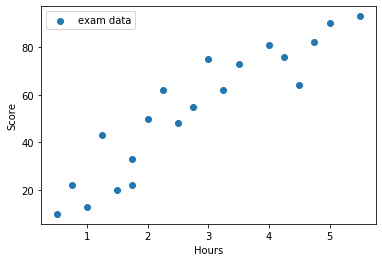

In [8]:
sca = plt.scatter(exam_X,exam_y,label='exam data')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend()
plt.show()

In [9]:
rDf=df.corr()
print('相关系数矩阵：')
rDf

相关系数矩阵：


,学习时间,分数
学习时间,1.000000,0.923985
分数,0.923985,1.000000


### 构建模型

#### 拆分数据集

In [10]:
from sklearn.model_selection import train_test_split

train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取训练数据（train）和测试数据（test）第一个参数：所要划分的样本特征，第二个参数：所要划分的样本标签，train_size：训练数据占比，如果是整数的话就是样本的数量

In [11]:
X_train , X_test , y_train , y_test = train_test_split(exam_X,exam_y,train_size=0.8)

In [12]:
#输出数据大小
print('原始数据特征：',exam_X.shape,'训练数据特征：',X_train.shape,'，测试数据特征：',X_test.shape)
print('原始数据标签：',exam_y.shape,'训练数据标签：',y_train.shape ,'测试数据标签：',y_test.shape)

原始数据特征： (20,) 训练数据特征： (16,) ，测试数据特征： (4,)
原始数据标签： (20,) 训练数据标签： (16,) 测试数据标签： (4,)


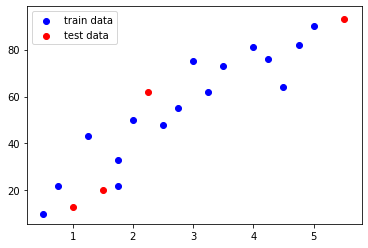

In [13]:
#散点图
plt.scatter(X_train, y_train, color="blue", label="train data")
plt.scatter(X_test, y_test, color="red", label="test data")
plt.legend()

#### 训练模型

In [14]:
#将训练数据特征转换成二维数组XX行*1列
X_train=X_train.values.reshape(-1,1)
#将测试数据特征转换成二维数组行数*1列
X_test=X_test.values.reshape(-1,1)
''' reshape(-1,列数)是根据所给的列数,自动按照原始数组的大小形成一个新的数组，
例如reshape(-1,1)就是改变成1列的数组，这个数组的长度是根据原始数组的大小来自动形成的。
reshape(行数,-1)是根据所给的行数，自动按照原始数组的大小形成一个新的数组。'''

#第1步：导入线性回归
from sklearn.linear_model import LinearRegression
#第2步：创建模型：线性回归
model = LinearRegression()
#第3步：训练模型
model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 获得截距和斜率

In [15]:
'''
最佳拟合线：z= + x
截距intercept：a
回归系数：b
'''

#截距
a=model.intercept_
#回归系数
b=model.coef_
print('最佳拟合线：截距a=',a,'，回归系数b=',b)

最佳拟合线：截距a= 10.809851965288402 ，回归系数b= [15.67126085]


#### 画出实际的散点图和预测的直线

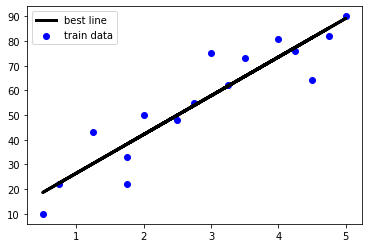

In [16]:
#训练数据散点图
plt.scatter(X_train, y_train, color='blue', label="train data")
#训练数据的预测值
y_train_pred = model.predict(X_train)
#绘制最佳拟合线
plt.plot(X_train, y_train_pred, color='black', linewidth=3, label="best line")
plt.legend()

### 模型评估

In [17]:
#线性回归的score方法得到的是决定系数R平方
model.score(X_test , y_test)
#score内部会对第一个参数X_test用拟合曲线自动计算出y预测值，内容是决定系数R平方的计算过程。

0.8446562427024281

### 总结

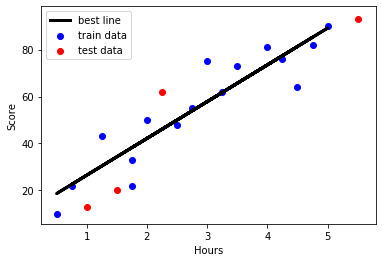

In [18]:
#导入绘图包
import matplotlib.pyplot as plt
#第1步：绘制训练数据散点图
plt.scatter(X_train, y_train, color='blue', label="train data")
#第2步：用训练数据绘制最佳线
#最佳拟合线训练数据的预测值
y_train_pred = model.predict(X_train)
#绘制最佳拟合线：标签用的是训练数据的预测值y_train_pred
plt.plot(X_train, y_train_pred, color='black', linewidth=3, label="best line")
#第3步：绘制测试数据的散点图
plt.scatter(X_test, y_test, color='red', label="test data")

#添加图标标签
plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Score")
#显示图像
plt.show()#导入绘图包
